In [ ]:
# 安裝必要的套件
!pip install pycaret pandas numpy matplotlib

# 下載Titanic資料集
!wget -O train.csv https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv
!wget -O test.csv https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv

# 載入資料與必要的套件
import pandas as pd
from pycaret.classification import *

# 讀取資料
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 查看訓練資料集的前幾行
print("Train Dataset:")
print(train.head())

# 簡單處理缺失值與特徵工程
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

# 處理測試集缺失值
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# 建立新特徵
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

# 刪除無用欄位
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 將類別變數轉換為類別型
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
test['Sex'] = test['Sex'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')

# 設定 PyCaret 環境
clf = setup(data=train,
            target='Survived',
            categorical_features=['Sex', 'Embarked'])

# 比較所有模型
best_model = compare_models(n_select=16)  # 比較 16 種模型


--2024-11-27 09:37:43--  https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2024-11-27 09:37:43 (55.6 MB/s) - ‘train.csv’ saved [61194/61194]

--2024-11-27 09:37:44--  https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘t

,Description,Value
0,Session id,6385
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 10)"
4,Transformed data shape,"(891, 12)"
5,Transformed train set shape,"(623, 12)"
6,Transformed test set shape,"(268, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8281,0.8564,0.7118,0.8219,0.7579,0.6265,0.6345,0.2590
gbc,Gradient Boosting Classifier,0.8185,0.8510,0.6989,0.8030,0.7405,0.6037,0.6124,0.1910
xgboost,Extreme Gradient Boosting,0.8168,0.8444,0.6991,0.8024,0.7424,0.6022,0.6096,0.1580
lightgbm,Light Gradient Boosting Machine,0.8107,0.8444,0.6949,0.7887,0.7333,0.5886,0.5961,0.2870
ada,Ada Boost Classifier,0.8088,0.8420,0.7491,0.7539,0.7473,0.5940,0.5985,0.1630
lr,Logistic Regression,0.8008,0.8456,0.6908,0.7639,0.7198,0.5677,0.5731,0.6660
ridge,Ridge Classifier,0.7992,0.8461,0.6947,0.7609,0.7205,0.5658,0.5713,0.0730
lda,Linear Discriminant Analysis,0.7976,0.8462,0.6947,0.7582,0.7191,0.5628,0.5683,0.0790
et,Extra Trees Classifier,0.7929,0.8455,0.7074,0.7440,0.7199,0.5569,0.5619,0.4100
nb,Naive Bayes,0.7751,0.8153,0.7201,0.7007,0.7071,0.5251,0.5283,0.1230


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [ ]:
# 選擇表現最好的模型
print("Best Model:")
print(best_model)

# 調整模型參數（以選擇的第一個模型為例）
tuned_model = tune_model(best_model[0])

# 評估模型
evaluate_model(tuned_model)

# 預測測試集
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model, data=test)

# 修復預測結果輸出
if 'Label' in predictions.columns:
    output_column = 'Label'
else:
    output_column = 'prediction_label'  # 根據 PyCaret 新版本的欄位名稱

# 將預測結果輸出到 CSV
submission = test[['PassengerId']].copy()
submission['Survived'] = predictions[output_column]
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

Best Model:
[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6385, verbose=0,
                       warm_start=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7756,0.5833,0.7778,0.6667,0.5051,0.5168
1,0.8730,0.9423,0.9167,0.7857,0.8462,0.7391,0.7455
2,0.8730,0.8964,0.8333,0.8333,0.8333,0.7308,0.7308
3,0.9032,0.9142,0.7826,0.9474,0.8571,0.7850,0.7932
4,0.8548,0.9232,0.8333,0.8000,0.8163,0.6964,0.6968
5,0.8710,0.9342,0.8750,0.8077,0.8400,0.7322,0.7338
6,0.8065,0.8092,0.6250,0.8333,0.7143,0.5724,0.5860
7,0.7742,0.8333,0.7917,0.6786,0.7308,0.5383,0.5430
8,0.7419,0.7533,0.6250,0.6818,0.6522,0.4477,0.4487


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Submission file saved as 'submission.csv'


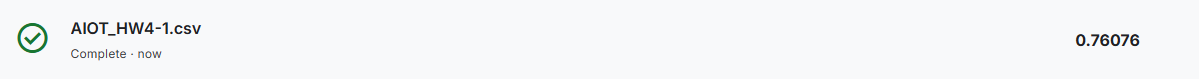